In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as stats

In [6]:
Badges = pd.read_xml("Badges.xml")
Comments = pd.read_xml("Comments.xml")
PostHistory = pd.read_xml("PostHistory.xml")
PostLinks = pd.read_xml("PostLinks.xml")
Posts = pd.read_xml("Posts.xml")
Tags = pd.read_xml("Tags.xml")
Users = pd.read_xml("Users.xml")
Votes = pd.read_xml("Votes.xml")

# Task 1
I used the data provided by the stack exchange for the Islam forum.
## Histogram

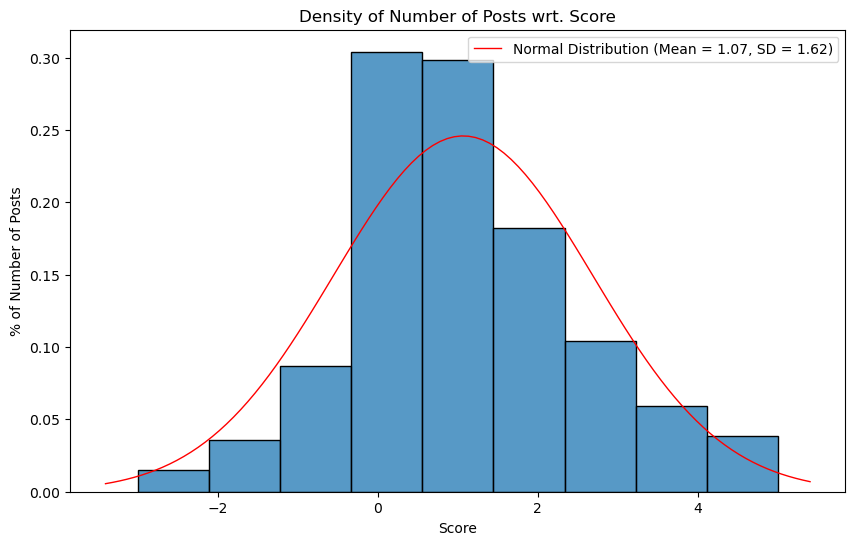

In [8]:
scores = Posts["Score"]
Q1 = scores.quantile(0.25)
Q3 = scores.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_scores_iqr = scores[(scores >= lower_bound) & (scores <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_scores_iqr, bins=9, stat="density")
mean = np.mean(filtered_scores_iqr)
std_dev = np.std(filtered_scores_iqr)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, linewidth=1,color="red")
plt.title('Density of Number of Posts wrt. Score')
plt.xlabel('Score')
plt.ylabel('% of Number of Posts')
plt.legend([f'Normal Distribution (Mean = {mean:.2f}, SD = {std_dev:.2f})'], loc='upper right')

plt.show()



This histogram shows the percentage of posts having some score. I removed the outliers for the graph to look more readable. As we can see the posts are distributed almost normally with the score they have.

## Bar Graph

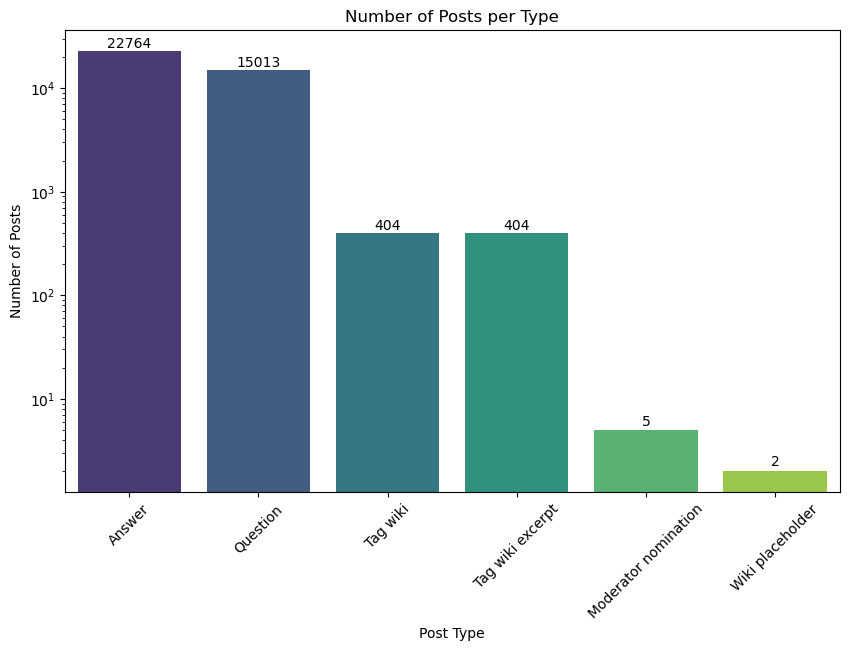

In [26]:
day_mapping = {1: 'Question', 2: 'Answer', 3: 'Orphaned tag wiki', 4: 'Tag wiki excerpt', 5: 'Tag wiki', 6: 'Moderator nomination', 7: 'Wiki placeholder'}
Posts['PostType'] = Posts['PostTypeId'].map(day_mapping)
post_type_counts = Posts['PostType'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette = 'viridis',hue=post_type_counts.index)
plt.title('Number of Posts per Type')
plt.xlabel('Post Type')
plt.ylabel('Number of Posts')
plt.yscale('log')
plt.xticks(rotation=45)
for i, v in enumerate(post_type_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
plt.show()


This bar graph shows the number of posts in $10^x$ with respect to the Post type. It shows how Questions and Answers are the most dominant post type while oothers like Wiki placeholder and moderator nomination are very rare.

## Heat Map

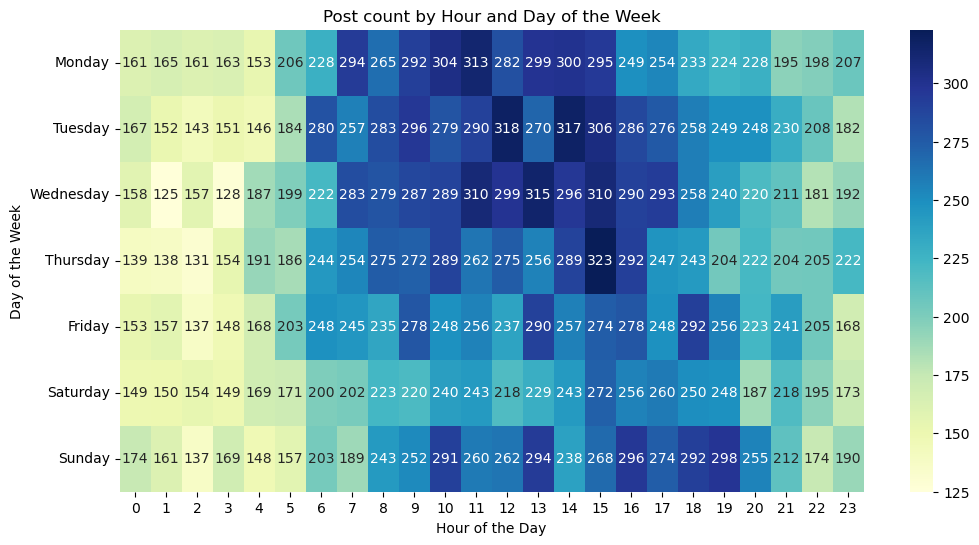

In [31]:
times = pd.to_datetime(Posts["CreationDate"])
Posts['Hour'] = times.dt.hour
Posts['DayOfWeek'] = times.dt.dayofweek
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
Posts['DayOfWeek'] = Posts['DayOfWeek'].map(day_mapping)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Posts['DayOfWeek'] = pd.Categorical(Posts['DayOfWeek'], categories=order, ordered=True)
post_count_by_hour_day = Posts.pivot_table(values='Id', index='DayOfWeek', columns='Hour', aggfunc='count',observed=False)
plt.figure(figsize=(12, 6))
sns.heatmap(post_count_by_hour_day, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Post count by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


This graph is a heatmap that shows the post count by hour and day of the week.

## Bubble Chart

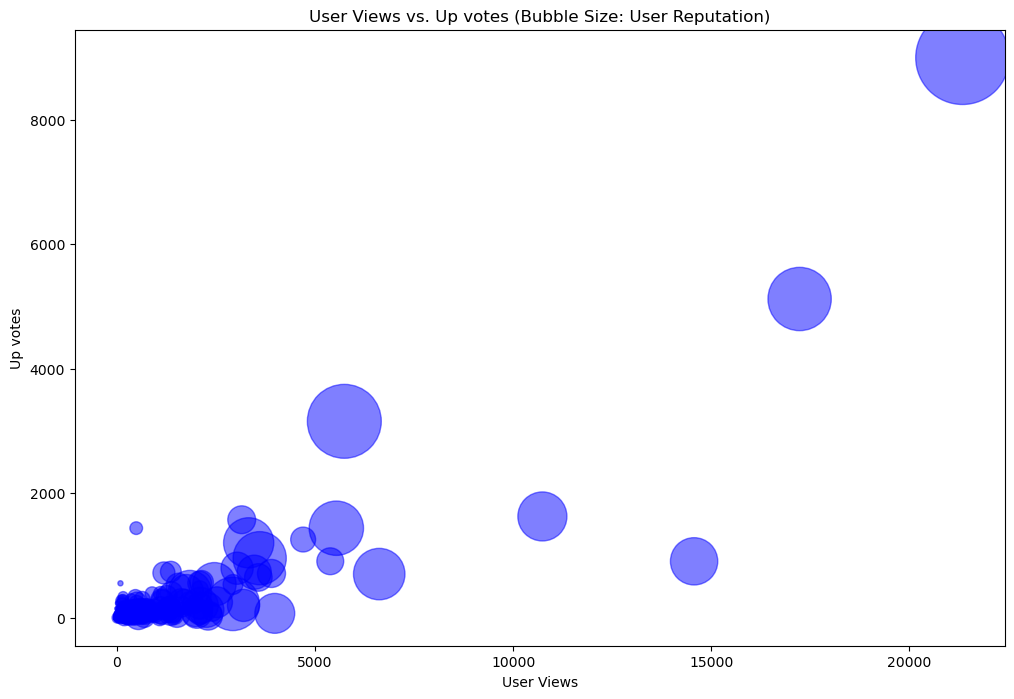

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(Users['Views'], Users['UpVotes'], s=Users['Reputation']/10, alpha=0.5, c='blue')
plt.title('User Views vs. Up votes (Bubble Size: User Reputation)')
plt.xlabel('User Views')
plt.ylabel('Up votes')
plt.show()


This is a bubble chart showing how user views and the number of their up votes is correlated, also with the size of the bubble we can see that as both of the views and up votes is higher, the reputation also tends to be higher.

## Box-and-Whiskers Plot

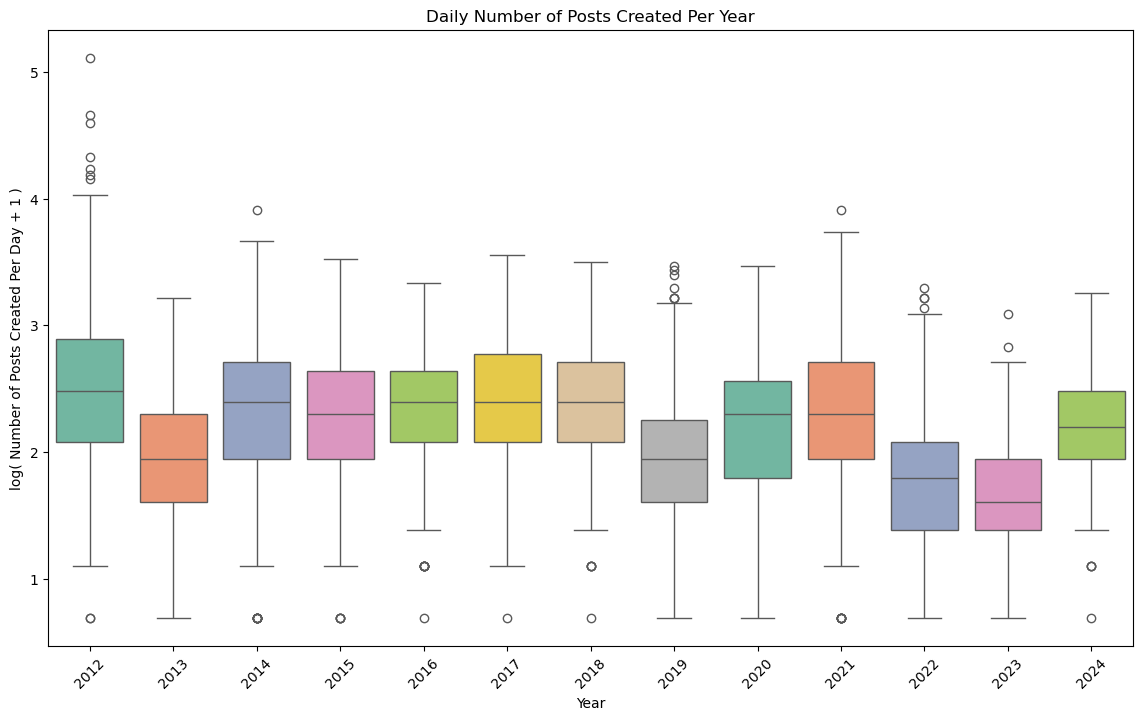

In [36]:
Posts['CreationDate'] = pd.to_datetime(Posts['CreationDate'])

Posts['Year'] = Posts['CreationDate'].dt.year
Posts['Date'] = Posts['CreationDate'].dt.date

posts_per_day = Posts.groupby(['Year', 'Date']).size().reset_index(name='PostCount')
posts_per_day['LogPostCount'] = np.log1p(posts_per_day['PostCount'])

plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='LogPostCount', data=posts_per_day, palette="Set2",hue='Year',legend=False)
plt.title('Daily Number of Posts Created Per Year')
plt.xlabel('Year')
plt.ylabel('log( Number of Posts Created Per Day + 1 )')
plt.xticks(rotation=45)
plt.show()

This box-and-whiskers plot shows the difference of the daily created posts for each year from 2012-2024. The values for the number of posts are log transformed because for some years the values are a lot higher than others.

# Task 2
#### ChatGPT query:

I am working with stack exchange dump data. It contains:  Badges, Comments, PostHistory, PostLinks, Posts, Tags, Users, and votes data. I would like to see how the word count from the post's Body affects and correlates to the Score of the posts. I want it to be represented by a scatter plot.


#### ChatGPT code:

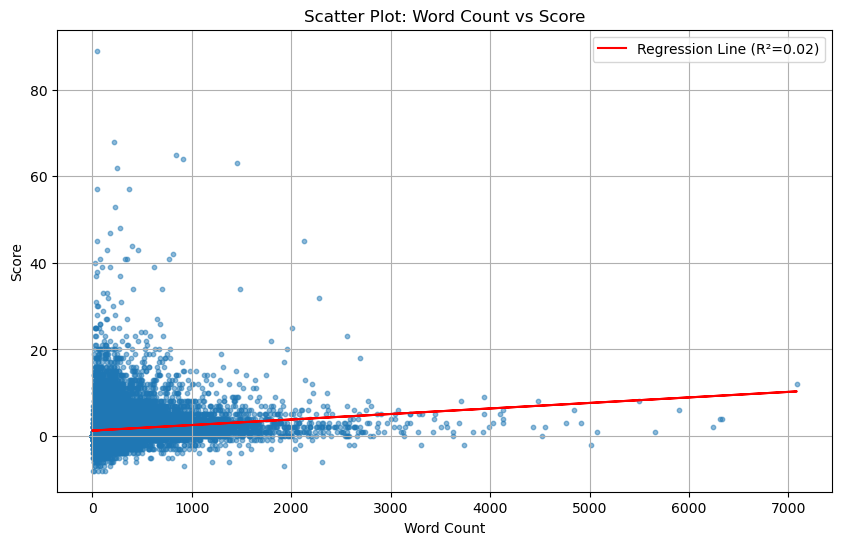

In [63]:
# Compute word count for each post's Body
def count_words(text):
    # Use regex to find words in the text
    return len(re.findall(r'\w+', text))

# Clean data: Replace NaN or non-string entries in the 'Body' column with an empty string
Posts['Body'] = Posts['Body'].fillna('').astype(str)

Posts['WordCount'] = Posts['Body'].apply(count_words)

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(Posts['WordCount'], Posts['Score'], alpha=0.5, s=10)
plt.title('Scatter Plot: Word Count vs Score')
plt.xlabel('Word Count')
plt.ylabel('Score')
plt.grid(True)

# Optional: Add a regression line (using numpy for simplicity)
from scipy.stats import linregress

x = Posts['WordCount']
y = Posts['Score']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line (R²={r_value**2:.2f})')
plt.legend()

# Show the plot
plt.show()

#### Conclusion:

##### Strengths:

* The scatter plot effectively visualizes the relationship between word count and score, making it easy to see patterns and outliers.
* Regression Line: Including a regression line helps in understanding the overall trend in the data.

##### Weakness:

* Several outliers with high scores and low word counts can skew the perception of the data.

##### Improvements:

* Applying a logarithmic scale to the x-axis (Word Count) could spread out the data points and make the plot easier to interpret.